In [65]:
import numpy as np
import pandas as pd
import glob, os
import itertools
import matplotlib.image as mpimg
import cv2
import pickle

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


%matplotlib inline
import matplotlib.pyplot as plt

def draw_detection(vid, fid,threshold,ax=None) :
    plt.rcParams['figure.figsize'] = [10, 5]
    boxes = detections[vid,fid,:,:].reshape(-1,5)
    boxes = boxes[boxes[:,0]>threshold]
    
    
    vid = real_starts_df.index[vid]
    fid = str(fid+1)
    filename = '/data1/yolo/validation/jpgs/'+str(vid)+'-'+'0'*(5-len(fid)) + fid +'.jpg'
    print(filename)

    if not os.path.isfile(filename) :
        print('can not find file ', filename)
        return
    
    im = np.array(Image.open(filename), dtype=np.uint8)
    
    if ax == None :
        ax = plt.subplot(111)
    # Display the image
    ax.imshow(im)

    # Create a Rectangle patch
    print('find boxes : ', boxes.shape[0])
    for b in boxes:
        print (b)
        rect = patches.Rectangle((b[1]-b[3]/2,b[2]-b[4]/2),b[3],b[4],linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
        ax.text(b[1], b[2], '%.2f' % (b[0]),horizontalalignment='left',verticalalignment='top')#, fontsize=24)

In [70]:
a = np.array([1,2,3,4,5,6,7,8])
a[[0,2,4]]

array([1, 3, 5])

In [4]:
real_starts_df = pd.read_csv('/data1/yolo/validation/failure_starts.csv', index_col=0, names=['start'])
index = {}
for i in range(len(real_starts_df)) :
    index[real_starts_df.index[i]] = i

In [7]:
detections = np.load('detection_top10_4d.npy')

/data1/yolo/validation/jpgs/593072155-00051.jpg
find boxes :  10
[2.42318679e-02 1.78671951e+02 3.11489929e+02 4.15167923e+01
 3.97500916e+01]
[1.70837399e-02 5.68051514e+02 3.85138306e+02 1.65987564e+02
 1.09994949e+02]
[1.65139288e-02 4.16429504e+02 3.81061584e+02 5.66759415e+01
 4.33183289e+01]
[1.45109557e-02 3.18904755e+02 4.23704742e+02 2.13758423e+02
 8.80497055e+01]
[1.27200615e-02 5.71926208e+02 2.79714417e+02 3.98433533e+01
 2.99520245e+01]
[1.16516650e-02 1.32207016e+02 3.15162933e+02 4.75651360e+01
 3.50295486e+01]
[1.08696017e-02 2.24774200e+02 3.16225281e+02 6.25648575e+01
 3.53749542e+01]
[1.06834816e-02 4.16384033e+02 3.51275787e+02 5.05481720e+01
 3.82907295e+01]
[9.24151763e-03 4.09770569e+02 1.61381927e+02 5.10980911e+01
 5.14866943e+01]
[9.00644995e-03 3.71581970e+02 1.72471268e+02 4.34570190e+02
 1.17292957e+03]


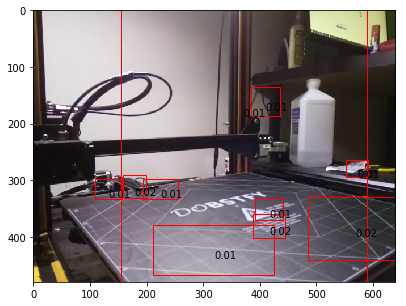

In [66]:
draw_detection(index[593072155],50,0)

/data1/yolo/validation/jpgs/591530556-00121.jpg
find boxes :  10
[2.23614760e-02 9.60786724e+00 3.52681335e+02 1.72180405e+01
 1.13814117e+02]
[1.29496045e-02 1.22864418e+01 3.18809021e+02 1.63565826e+01
 1.03018120e+02]
[1.05691869e-02 1.73745594e+01 2.78452881e+02 1.83042564e+01
 6.72721558e+01]
[9.70443804e-03 1.51077671e+01 4.27666687e+02 2.05069199e+01
 9.90895309e+01]
[8.35969858e-03 2.26761818e+01 1.61661110e+01 3.06573257e+01
 3.29293785e+01]
[8.35271738e-03 6.11932007e+02 2.01326431e+02 4.22590942e+01
 4.86863556e+01]
[6.69417297e-03 1.99867802e+01 4.64989685e+02 3.18445206e+01
 2.78755550e+01]
[6.26103161e-03 7.80419617e+01 3.52053497e+02 1.20292267e+02
 1.53323303e+02]
[6.09684549e-03 6.16665466e+02 4.63991089e+02 4.17900772e+01
 2.96268158e+01]
[6.02171477e-03 4.60565826e+02 2.84536316e+02 7.90521317e+01
 4.52023888e+01]


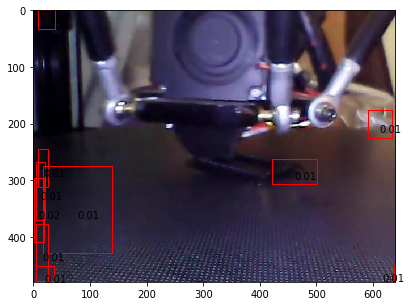

In [57]:
draw_detection(index[591530556],120,0)

In [71]:
def generator () :
    i = 0
    while (True) :
        i = i+1
        yield i


In [121]:
a = np.array([False,False, True])
b= np.where(a==True)
print(len(b[0]))

1
